In [1]:
#importing librarys

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import json
import ast
from wordcloud import WordCloud, STOPWORDS

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

/var/folders/71/4rl6w509079c20dtbvnqwf1c0000gn/T/ipykernel_4461/965964857.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
df = pd.read_csv('./Datasets/dataset_transformado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45376 non-null  float64
 2   genres                 45379 non-null  object 
 3   id                     45379 non-null  object 
 4   original_language      45368 non-null  object 
 5   overview               44438 non-null  object 
 6   popularity             45377 non-null  object 
 7   production_companies   33580 non-null  object 
 8   production_countries   39165 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45379 non-null  float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       41608 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  ti

In [4]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [5]:
print_categories(df)

belongs_to_collection :  Categorical
budget :  Numerical
genres :  Categorical
id :  Categorical
original_language :  Categorical
overview :  Categorical
popularity :  Categorical
production_companies :  Categorical
production_countries :  Categorical
release_date :  Categorical
revenue :  Numerical
runtime :  Numerical
spoken_languages :  Categorical
status :  Categorical
tagline :  Categorical
title :  Categorical
vote_average :  Numerical
release_year :  Numerical
return :  Numerical


In [9]:
#The minimum and maximum value of a dataset can easily be obtained with the min and max function on a Series.

print("Minimum value: ", df["budget"].min())
print("Maximum value: ", df["budget"].max())

Minimum value:  0.0
Maximum value:  380000000.0


In [10]:
print(df["budget"].mode())

0    0.0
Name: budget, dtype: float64


In [77]:
mean = df["budget"].mean()
median = df["budget"].median()
standarddev = df["budget"].std()
print(mean)
print(median)
print(standarddev)

4234169.108159351
0.0
17442939.54485332


In [12]:
quantile = df["budget"].quantile([.25, .5, .75])
print(quantile)

0.25    0.0
0.50    0.0
0.75    0.0
Name: budget, dtype: float64


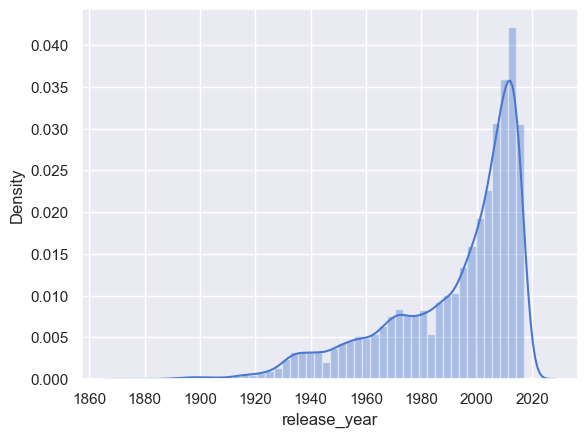

In [13]:
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(df["release_year"].dropna());

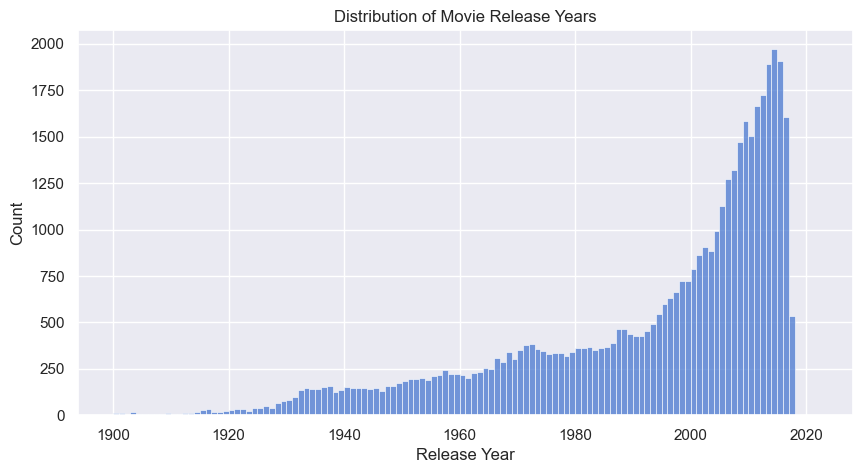

In [14]:
#distribution of movie release years
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=np.arange(1900, 2023, 1))
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Profiling Libraries

In [15]:
df.describe()

budget       revenue       runtime  vote_average  release_year  \
count  4.537600e+04  4.537900e+04  45130.000000  45376.000000  45376.000000   
mean   4.232604e+06  1.122936e+07     94.181675      5.624070   1991.881193   
std    1.743986e+07  6.438789e+07     38.341059      1.915423     24.055360   
min    0.000000e+00  0.000000e+00      0.000000      0.000000   1874.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000   1978.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000   2001.000000   
75%    0.000000e+00  0.000000e+00    107.000000      6.800000   2010.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000   2020.000000   

        return  
count  45379.0  
mean       inf  
std        NaN  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        inf

In [16]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
#descubro una entrada en 'popularity' que no es numerica y la mayoria de sus datos son nulos

df = df.drop(index=35543)

In [18]:
df['popularity'] = pd.to_numeric(df['popularity'])

In [19]:
df['popularity'].dtype

dtype('float64')

<AxesSubplot: >

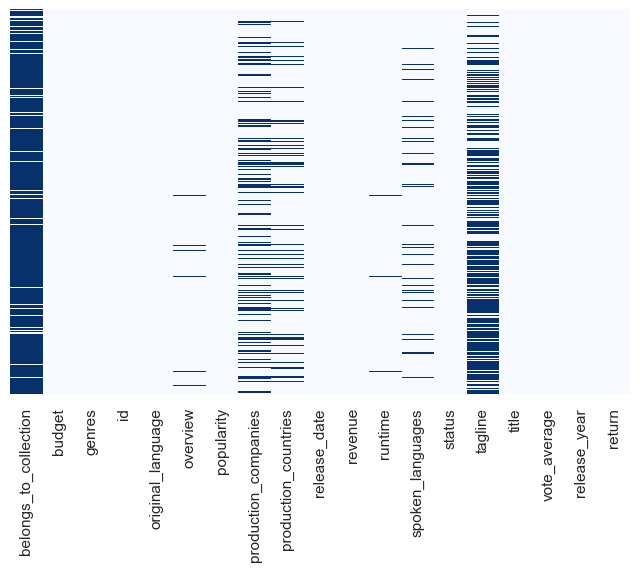

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cmap='Blues',cbar=False,yticklabels=False)

In [21]:
df['status'].value_counts()

Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [22]:
# hay columnas que no me sirven para el modelo, por lo que elijo dejarlas ahora

#df = df.drop(['tagline', 'budget', 'revenue', 'status', 'return'], axis=1)

<img src="Screenshot 2023-05-12 at 08.52.00.png">

In [23]:
df.isnull().sum()

belongs_to_collection    40890
budget                       2
genres                       0
id                           0
original_language           11
overview                   941
popularity                   2
production_companies     11798
production_countries      6213
release_date                 2
revenue                      0
runtime                    248
spoken_languages          3770
status                      82
tagline                  24980
title                        2
vote_average                 2
release_year                 2
return                       0
dtype: int64

In [79]:
#cuento cuantos duplicados hay
df.duplicated().sum()

TypeError: unhashable type: 'list'

In [25]:
#dropeo los duplicados
df = df.drop_duplicates()

In [26]:
import ast
#Para graficar los géneros correctamente, primero necesitamos asegurarnos de que los valores en la columna 'genres' sean listas y no cadenas de texto. 

df['genres'] = df['genres'].apply(ast.literal_eval)

In [27]:
#number of movies for each genre
all_genres = np.concatenate(df['genres'].values)
unique_genres, counts = np.unique(all_genres, return_counts=True)
genre_counts = pd.DataFrame({'genre': unique_genres, 'count': counts}).sort_values(by='count', ascending=False)

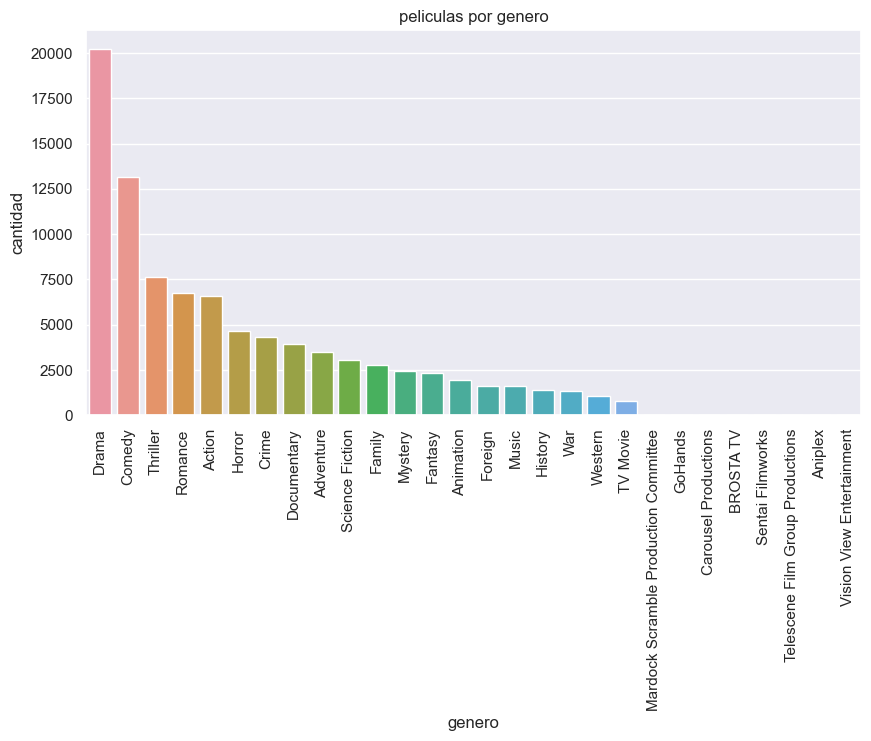

In [28]:
# distribution of genres
plt.figure(figsize=(10, 5))
sns.barplot(x='genre', y='count', data=genre_counts)
plt.title('peliculas por genero')
plt.xlabel('genero')
plt.ylabel('cantidad')
plt.xticks(rotation=90)
plt.show()

explorar si 'runtime' y 'release_year' tienen problemas y si seran importantes para el modelo:

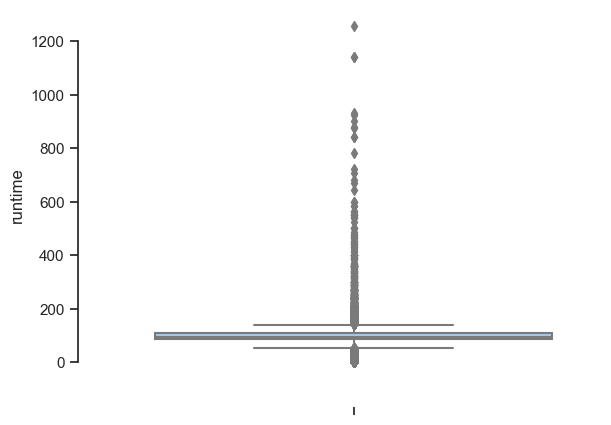

In [29]:
#ver valores atipicos
sns.set_theme(style="ticks", palette="pastel")

# ver si hay atipicos en runtime
sns.boxplot(data=df, y='runtime')
sns.despine(offset=20, trim=True)


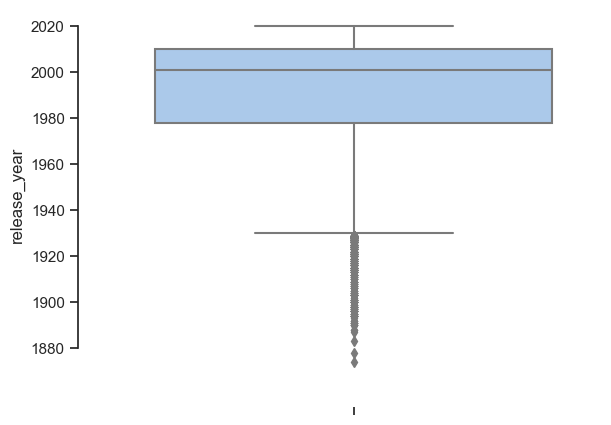

In [30]:
# ver si hay atipicos en runtime
sns.boxplot(data=df, y='release_year')
sns.despine(offset=20, trim=True)

In [31]:

# Obtiene el valor máximo y mínimo de la columna
valor_maximo = df['runtime'].max()
valor_minimo = df['runtime'].min()

# Imprime los valores máximo y mínimo
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

# Cuenta cuántas filas tienen el valor 0 en la columna 'runtime'
conteo_ceros = (df['runtime'] == 0).sum()

# Imprime el resultado
print("Número de filas con valor 0 en 'runtime':", conteo_ceros)


Valor máximo: 1256.0
Valor mínimo: 0.0
Número de filas con valor 0 en 'runtime': 1535


In [32]:
# Obtiene el valor máximo y mínimo de la columna
valor_maximo = df['release_year'].max()
valor_minimo = df['release_year'].min()

# Imprime los valores máximo y mínimo
print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 2020.0
Valor mínimo: 1874.0


In [33]:
df[df['release_year'] != 'NaT'][['title', 'release_year']].sort_values('release_year').head(10)

title  release_year
34897               Passage of Venus        1874.0
34894     Sallie Gardner at a Gallop        1878.0
41536                Buffalo Running        1883.0
34890    Man Walking Around a Corner        1887.0
34891               Accordion Player        1888.0
34895  Traffic Crossing Leeds Bridge        1888.0
34892            Monkeyshines, No. 1        1890.0
41129                      Mosquinha        1890.0
34893            Monkeyshines, No. 2        1890.0
34896      London's Trafalgar Square        1890.0

In [34]:
# release_year: es dudoso que hayan peliculas de antes de 1890
# hay que imputar valores de runtime ya que no pueden haber peliculas de 0 min

ahora quiero analizar los vote_average

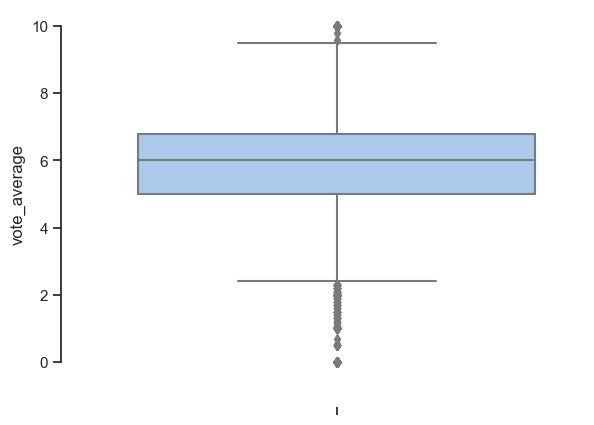

In [35]:
# ver si hay atipicos 
sns.boxplot(data=df, y='vote_average')
sns.despine(offset=20, trim=True)

In [36]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [37]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

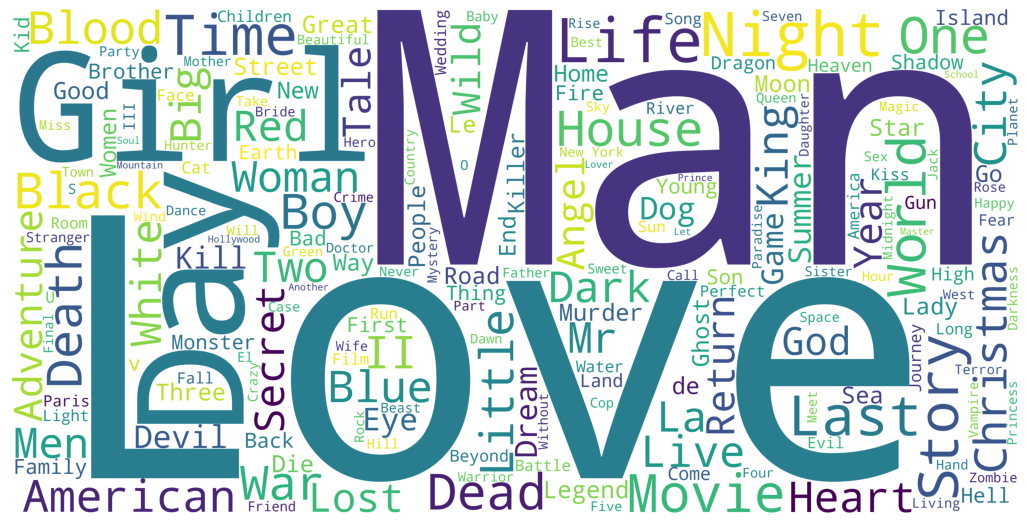

In [38]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(13,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

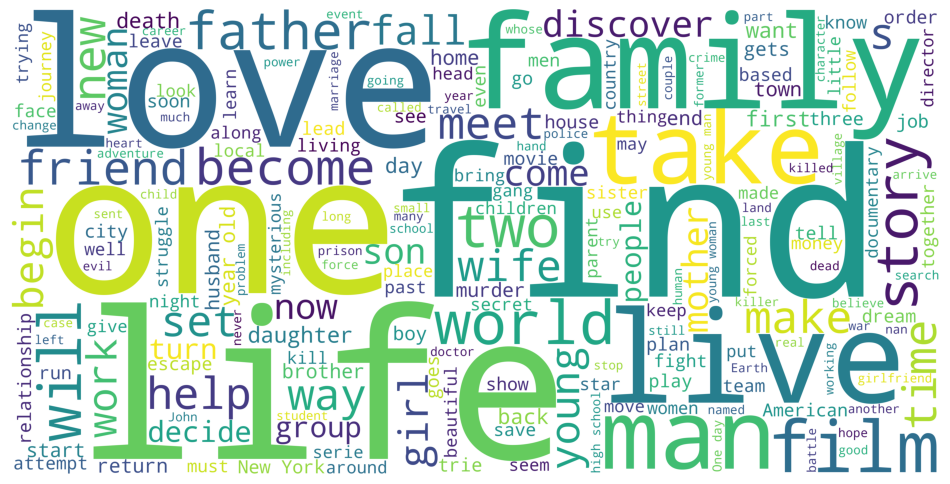

In [39]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(12,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. Together with Love, Man and Girl, these wordclouds give us a pretty good idea of the most popular themes present in movies.

In [40]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

number language
en   32192       en
fr    2436       fr
it    1528       it
ja    1349       ja
de    1077       de

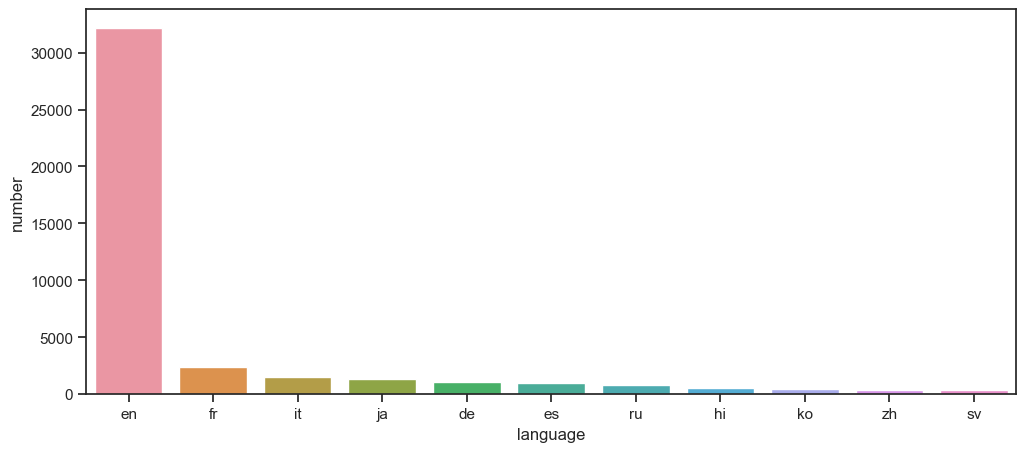

In [41]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[:11])
plt.show()

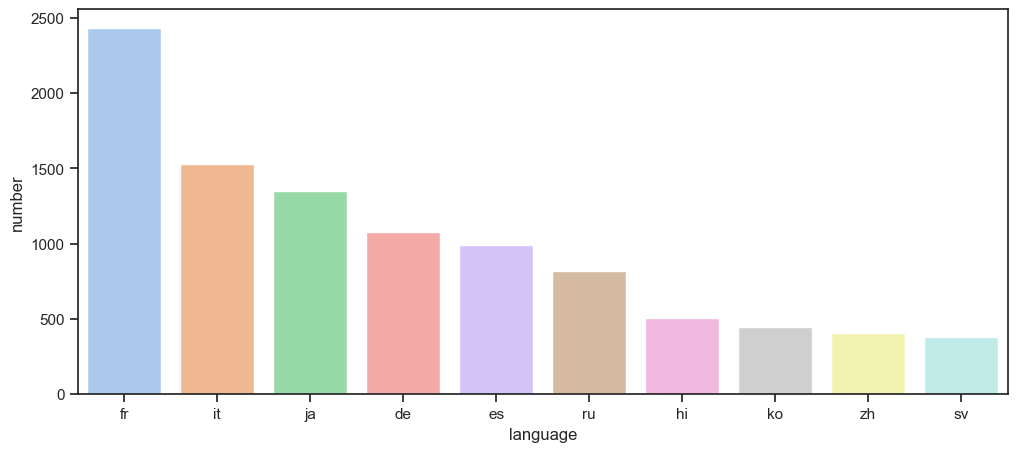

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

Most Popular Movies by Popularity Score

In [43]:
df[['title', 'popularity', 'release_year']].sort_values('popularity', ascending=False).head(10)

title  popularity  release_year
30667                         Minions  547.488298        2015.0
33318                    Wonder Woman  294.337037        2017.0
42154            Beauty and the Beast  287.253654        2017.0
43570                     Baby Driver  228.032744        2017.0
24427                      Big Hero 6  213.849907        2014.0
26535                        Deadpool  187.860492        2016.0
26537  Guardians of the Galaxy Vol. 2  185.330992        2017.0
14545                          Avatar  185.070892        2009.0
24323                       John Wick  183.870374        2014.0
23649                       Gone Girl  154.801009        2014.0

In [44]:
df['vote_average'].describe()

count    45359.000000
mean         5.624176
std          1.915294
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

Most Voted on Movies

In [45]:
df[['title', 'vote_average', 'release_year']].sort_values('vote_average', ascending=False).head(10)

title  vote_average  \
37285                                       Book of Days          10.0   
39102                                      Truckfighters          10.0   
31784                                        Summer City          10.0   
21468                                  A Ticklish Affair          10.0   
31690                                The Kreutzer Sonata          10.0   
186                                             Reckless          10.0   
21594                                       Almost Kings          10.0   
4042                                         Simon Magus          10.0   
21620    Ice Age Columbus: Who Were the First Americans?          10.0   
39023  Old Fashioned: The Story of the Wisconsin Supp...          10.0   

       release_year  
37285        1989.0  
39102        2011.0  
31784        1977.0  
21468        1963.0  
31690        2008.0  
186          1995.0  
21594        2010.0  
4042         1999.0  
21620        2005.0  
39023        2015.0

<AxesSubplot: xlabel='vote_average', ylabel='Density'>

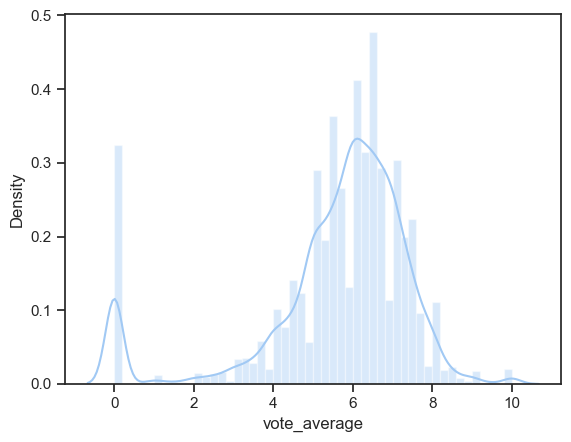

In [46]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

Movie Release Dates

In [47]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [48]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [49]:
import datetime

def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [50]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<AxesSubplot: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

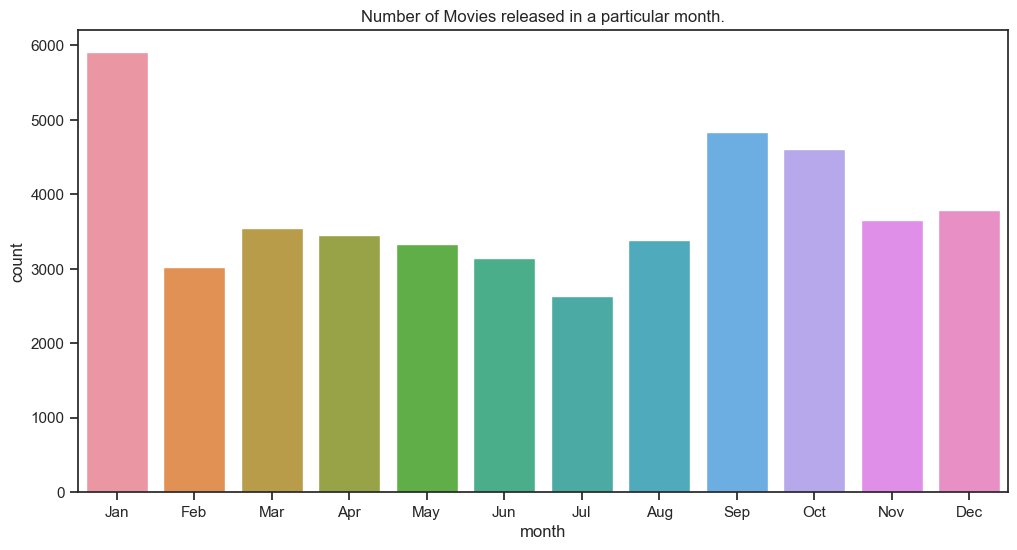

In [51]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<AxesSubplot: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

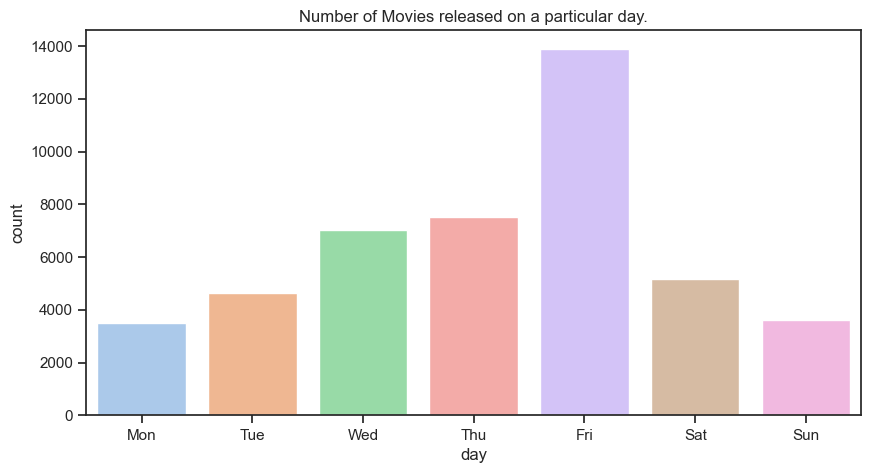

In [52]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

Number of Movies by the year

<AxesSubplot: xlabel='release_year'>

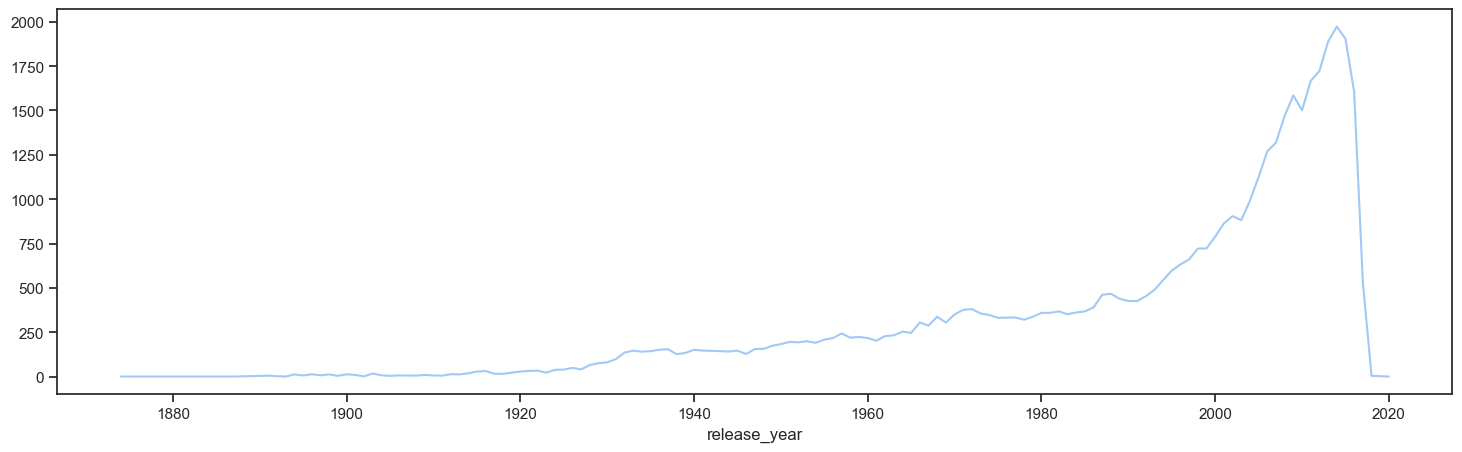

In [53]:
year_count = df.groupby('release_year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

runtime

In [54]:
df['runtime'].describe()

count    45113.000000
mean        94.179726
std         38.345705
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

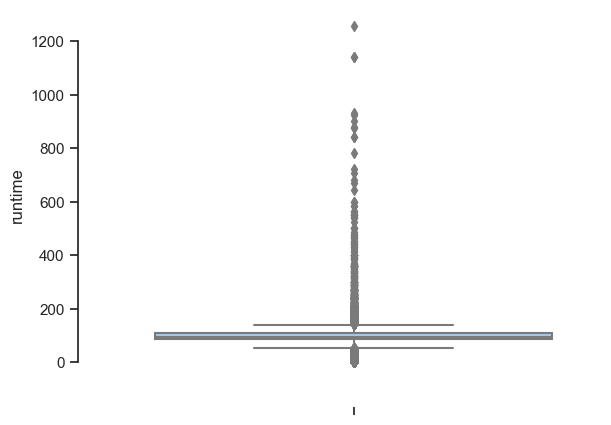

In [55]:
# ver si hay atipicos 
sns.boxplot(data=df, y='runtime')
sns.despine(offset=20, trim=True)

<AxesSubplot: xlabel='runtime', ylabel='Density'>

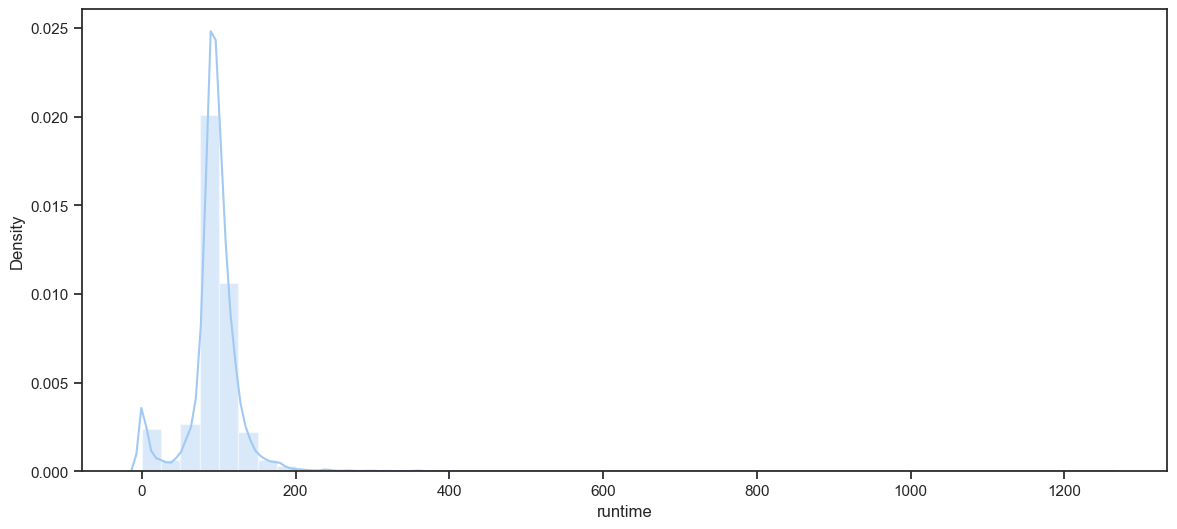

In [56]:
plt.figure(figsize=(14,6))
sns.distplot(df['runtime'])

In [57]:
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)


runtime                                     title  release_year
36531      1.0                            Champs de Mars        1900.0
35032      1.0                                Men Boxing        1891.0
41799      1.0  Panorama du grand Canal pris d'un bateau        1896.0
41798      1.0                               Baby's Meal        1895.0
17323      1.0                                 Meat Love        1989.0
25184      1.0                                  The Kiss        1900.0
16250      1.0                         The Human Pyramid        1899.0
34902      1.0                            Newark Athlete        1891.0
41243      1.0                                Tetra Vaal        2004.0
34897      1.0                          Passage of Venus        1874.0

In [58]:
df[df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

runtime                                title  release_year
24150   1256.0                           Centennial        1978.0
19948   1140.0                                 Jazz        2001.0
40876   1140.0                             Baseball        1994.0
13762    931.0                Berlin Alexanderplatz        1980.0
13947    925.0       Heimat: A Chronicle of Germany        1984.0
27825    900.0        The Story of Film: An Odyssey        2011.0
26653    877.0                                Taken        2002.0
19144    874.0                              The War        2007.0
34689    840.0          Seventeen Moments in Spring        1973.0
34624    840.0  The Roosevelts: An Intimate History        2014.0

Most Successful Movies

In [59]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'release_year']].sort_values('return', ascending=False).head(10)

title      budget      revenue     return  \
1063    E.T. the Extra-Terrestrial  10500000.0  792965326.0  75.520507   
256                      Star Wars  11000000.0  775398007.0  70.490728   
1336                          Jaws   7000000.0  470654000.0  67.236286   
1886                  The Exorcist   8000000.0  441306145.0  55.163268   
352    Four Weddings and a Funeral   6000000.0  254700832.0  42.450139   
832                  The Godfather   6000000.0  245066411.0  40.844402   
4488            Look Who's Talking   7500000.0  296000000.0  39.466667   
24230                    Annabelle   6500000.0  255273813.0  39.272894   
1054                 Dirty Dancing   6000000.0  213954274.0  35.659046   
1004            The Sound of Music   8200000.0  286214286.0  34.904181   

       release_year  
1063         1982.0  
256          1977.0  
1336         1975.0  
1886         1973.0  
352          1994.0  
832          1972.0  
4488         1989.0  
24230        2014.0  
1054         1987.0  
1004         1965.0

imputacion de algunos valores

In [ ]:
#en 

In [ ]:
#podria discretizar la popularidad para usarla como metodo de validacion de prioridad luego en el modelo

